# Project 3: House Price Prediction

Objective: Predict house prices based on various features like location, size, and house
characteristics.

## Model Building: Train and evaluate at least TWO machine learning models to predict the target variable.

## Imports

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
import warnings 
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

## Reading Data

In [52]:
df = pd.read_csv("../Cleaning/cleaned_house_data.csv")
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


## Modeling

In [53]:
results = pd.DataFrame({'Algorithm': ['Gradient Boosting', 'Support Vector Regression', 'Random Forest', 
                         'Linear Regression', 'Adaboost', 'Decision Tree', 'KNN'],
           'R2-score': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
           'Root_Mean_Squar_Error': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
           'Mean_Absolute_Error': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
           'best_params_':[[], [], [], [], [], [], []],
           'Log_R2-score': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
           'Log_Root_Mean_Squar_Error': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
           'Log_Mean_Absolute_Error': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
           'Log_best_params_':[[], [], [], [], [], [], []]})

In [113]:
results

,Algorithm,R2-score,Root_Mean_Squar_Error,Mean_Absolute_Error,best_params_,Log_R2-score,Log_Root_Mean_Squar_Error,Log_Mean_Absolute_Error,Log_best_params_
0,Gradient Boosting,0.899322,26366.922191,16855.289545,"{'learning_rate': 0.1, 'loss': 'squared_error'...",0.931568,0.109906,0.083383,"{'learning_rate': 0.1, 'loss': 'squared_error'..."
1,Support Vector Regression,0.893379,27133.970039,16387.339781,"{'C': 200, 'degree': 1, 'epsilon': 3, 'gamma':...",0.928651,0.112224,0.076045,"{'C': 0.001, 'degree': 1, 'epsilon': 0.01, 'ga..."
2,Random Forest,0.880663,28706.551992,18016.769921,"{'max_depth': None, 'min_samples_split': 10, '...",0.910309,0.125824,0.089090,"{'max_depth': None, 'min_samples_split': 2, 'n..."
3,Linear Regression,0.888917,27695.982481,17468.376374,"{'alpha': 50, 'l1_ratio': 0.99}",0.923828,0.115955,0.084042,"{'alpha': 0.1, 'l1_ratio': 0.1}"
4,Adaboost,0.830967,34164.782349,24218.359493,{'n_estimators': 40},0.847636,0.163995,0.125649,{'n_estimators': 40}
5,Decision Tree,0.768361,39994.304298,24528.355462,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.833157,0.171611,0.127112,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_..."
6,KNN,0.736708,42639.444849,26595.900196,{'n_neighbors': 7},0.749310,0.210358,0.147732,{'n_neighbors': 8}


**working on log transform of y target label**

**Separate out the data into X features and y target label**

In [54]:
X = df.drop(['Property_Sale_Price_natural_log','Property_Sale_Price'],axis=1)
y = df['Property_Sale_Price']
log_y = df['Property_Sale_Price_natural_log']

**Perform a Train|Test split on the data, with a 10% test size. Note: The solution uses a random state of 101**

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
X_train_log, X_test_log, log_y_train, log_y_test = train_test_split(X, log_y, test_size=0.1, random_state=101)


**Scale the X train and X test data.**

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [58]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [59]:
scaler_log = StandardScaler()
scaled_X_train_log = scaler_log.fit_transform(X_train_log)
scaled_X_test_log = scaler_log.transform(X_test_log)

In [60]:
def run_model(model,param_grid,algorithm,results,
             scaled_X_train,scaled_X_test,y_train,y_test,log):
    
    #Grid
    grid = GridSearchCV(model,param_grid=param_grid, cv=5,
                    scoring='neg_mean_squared_error', n_jobs=-1)
    #work on house price
    # Fit Model
    grid.fit(scaled_X_train,y_train)
    
    # Get Metrics
    
    preds = grid.predict(scaled_X_test)
    if log:
        rmse = np.sqrt(mean_squared_error(log_y_test,preds))
        results['Log_Root_Mean_Squar_Error'][algorithm] = rmse
        print(f'Root_Mean_Squar_Error : {rmse}')
    
        mae = mean_absolute_error(y_test,preds)
        results['Log_Mean_Absolute_Error'][algorithm] = mae
        print(f'RMSE : {mae}')
    
        r2score = r2_score(y_test, preds)
        results['Log_R2-score'][algorithm] = r2score
        print(f'R2-score : {r2score}')
        
        results['Log_best_params_'][algorithm] = grid.best_params_

    else:
        rmse = np.sqrt(mean_squared_error(y_test,preds))
        results['Root_Mean_Squar_Error'][algorithm] = rmse
        print(f'Root_Mean_Squar_Error : {rmse}')

        mae = mean_absolute_error(y_test,preds)
        results['Mean_Absolute_Error'][algorithm] = mae
        print(f'RMSE : {mae}')
    
        r2score = r2_score(y_test, preds)
        results['R2-score'][algorithm] = r2score
        print(f'R2-score : {r2score}')
        
        results['best_params_'][algorithm] = grid.best_params_
    

## Support Vector Regression Model
**Use a GridSearchCV to run a grid search for the best SVR() parameters.**

In [61]:
from sklearn.svm import SVR

In [62]:
svr = SVR()

In [63]:
param_grid = {'C':[100,200,300],
             'kernel':['linear','rbf'],
              'gamma':['scale','auto'],
              'degree':[1,2],
              'epsilon':[0.1,1,2,3]}

**Working with normal y**

In [66]:
run_model(svr,param_grid,1,results,
             scaled_X_train,scaled_X_test,y_train,y_test,0)

Root_Mean_Squar_Error : 27133.970039124877
RMSE : 16387.339780727696
R2-score : 0.8933793085271997


**Working with normal log transform of y**

In [68]:
svr = SVR()

param_grid = {'C':[0,0.001,0.01],
             'kernel':['linear','rbf'],
              'gamma':['scale','auto'],
              'degree':[1],
              'epsilon':[0,0.01,0.1]}

In [69]:
run_model(svr,param_grid,1,results,
             scaled_X_train_log,scaled_X_test_log,log_y_train,log_y_test,1)

Root_Mean_Squar_Error : 0.11222398814156885
RMSE : 0.07604487426859946
R2-score : 0.9286506312221211


## Gradient Boosting Regression Model
**Use a GridSearchCV to run a grid search for the best GradientBoostingRegressor() parameters.**

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

**Working with normal y**

In [72]:
gbr = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
    "min_samples_split": [5],
     "loss": ["squared_error"]
}

In [73]:
run_model(gbr,param_grid,0,results,
             scaled_X_train,scaled_X_test,y_train,y_test,0)

Root_Mean_Squar_Error : 26366.922191128862
RMSE : 16855.28954460517
R2-score : 0.899322206756173


**Working with normal log transform of y**

In [75]:
gbr = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
    "min_samples_split": [5],
     "loss": ["squared_error"]
}

In [76]:
run_model(gbr,param_grid,0,results,
             scaled_X_train_log,scaled_X_test_log,log_y_train,log_y_test,1)

Root_Mean_Squar_Error : 0.10990559723455359
RMSE : 0.0833829259031741
R2-score : 0.9315681375684224


## Random Forest Regression Model
**Use a GridSearchCV to run a grid search for the best RandomForestRegressor() parameters.**

In [78]:
from sklearn.ensemble import RandomForestRegressor

**Working with normal y**

In [79]:
rfr = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

In [80]:
run_model(rfr,param_grid,2,results,
             scaled_X_train,scaled_X_test,y_train,y_test,0)

Root_Mean_Squar_Error : 28706.55199227705
RMSE : 18016.769920999406
R2-score : 0.8806625164766101


**Working with normal log transform of y**

In [83]:
rfr = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

In [84]:
run_model(rfr,param_grid,2,results,
             scaled_X_train_log,scaled_X_test_log,log_y_train,log_y_test,1)

Root_Mean_Squar_Error : 0.12582420163448788
RMSE : 0.08909012857632675
R2-score : 0.9103093636002758


## Linear Regression Model
**Use a GridSearchCV to run a grid search for the best ElasticNet() parameters.**

In [86]:
from sklearn.linear_model import ElasticNet

**Working with normal y**

In [87]:
en = ElasticNet()
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [88]:
run_model(en,param_grid,3,results,
             scaled_X_train,scaled_X_test,y_train,y_test,0)

/home/ReemGamal/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.042e+09, tolerance: 6.382e+08
  model = cd_fast.enet_coordinate_descent(
/home/ReemGamal/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.949e+10, tolerance: 6.382e+08
  model = cd_fast.enet_coordinate_descent(
/home/ReemGamal/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

Root_Mean_Squar_Error : 27695.982481343704
RMSE : 17468.37637400925
R2-score : 0.8889168045858178


**Working with normal log transform of y**

In [90]:
en = ElasticNet()

param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [91]:
run_model(en,param_grid,3,results,
             scaled_X_train_log,scaled_X_test_log,log_y_train,log_y_test,1)

Root_Mean_Squar_Error : 0.11595483048606665
RMSE : 0.08404235781435634
R2-score : 0.9238278122213629


## Adaboost Regression Model
**Use a GridSearchCV to run a grid search for the best AdaBoostRegressor() parameters.**

In [93]:
from sklearn.ensemble import AdaBoostRegressor

**Working with normal y**

In [94]:
abr = AdaBoostRegressor()
param_grid = {"n_estimators": [1, 40]}

In [95]:
run_model(abr,param_grid,4,results,
             scaled_X_train,scaled_X_test,y_train,y_test,0)

Root_Mean_Squar_Error : 34164.78234908748
RMSE : 24218.35949332511
R2-score : 0.830966754878923


**Working with normal log transform of y**

In [97]:
abr = AdaBoostRegressor()

param_grid = {"n_estimators": [1, 40]}

In [98]:
run_model(abr,param_grid,4,results,
             scaled_X_train_log,scaled_X_test_log,log_y_train,log_y_test,1)

Root_Mean_Squar_Error : 0.1639954208646223
RMSE : 0.12564854088131874
R2-score : 0.8476360643980407


## Decision Tree Regressor Model
**Use a GridSearchCV to run a grid search for the best DecisionTreeRegressor() parameters.**

In [100]:
from sklearn.tree import DecisionTreeRegressor

**Working with normal y**

In [101]:
dtr = DecisionTreeRegressor()
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [102]:
run_model(dtr,param_grid,5,results,
             scaled_X_train,scaled_X_test,y_train,y_test,0)

Root_Mean_Squar_Error : 39994.304298431445
RMSE : 24528.35546197201
R2-score : 0.7683613070199667


**Working with normal log transform of y**

In [103]:
dtr = DecisionTreeRegressor()
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [105]:
run_model(dtr,param_grid,5,results,
             scaled_X_train_log,scaled_X_test_log,log_y_train,log_y_test,1)

Root_Mean_Squar_Error : 0.17161065961643052
RMSE : 0.12711206856398594
R2-score : 0.8331572805966023


## k Nearest Neighbor Regression Model
**Use a GridSearchCV to run a grid search for the best KNeighborsRegressor() parameters.**

In [107]:
from sklearn.neighbors import KNeighborsRegressor

**Working with normal y**

In [108]:
knnr = KNeighborsRegressor()
param_grid = {'n_neighbors': range(1, 21)}

In [109]:
run_model(knnr,param_grid,6,results,
             scaled_X_train,scaled_X_test,y_train,y_test,0)

Root_Mean_Squar_Error : 42639.44484864079
RMSE : 26595.90019569472
R2-score : 0.7367078591095144


**Working with normal log transform of y**

In [110]:
knnr = KNeighborsRegressor()
param_grid = {'n_neighbors': range(1, 21)}

In [112]:
run_model(knnr,param_grid,6,results,
             scaled_X_train_log,scaled_X_test_log,log_y_train,log_y_test,1)

Root_Mean_Squar_Error : 0.21035785753259403
RMSE : 0.14773171535990928
R2-score : 0.7493104582076793


**Evaluate The Models**

**Plot For House Prices**


In [134]:
data = {
    'Algorithm': results['Algorithm'].tolist(),
    'R2-score': results['R2-score'].tolist(),
    'Root_Mean_Squar_Error': results['Root_Mean_Squar_Error'].tolist(),
    'Mean_Absolute_Error': results['Mean_Absolute_Error'].tolist()
}

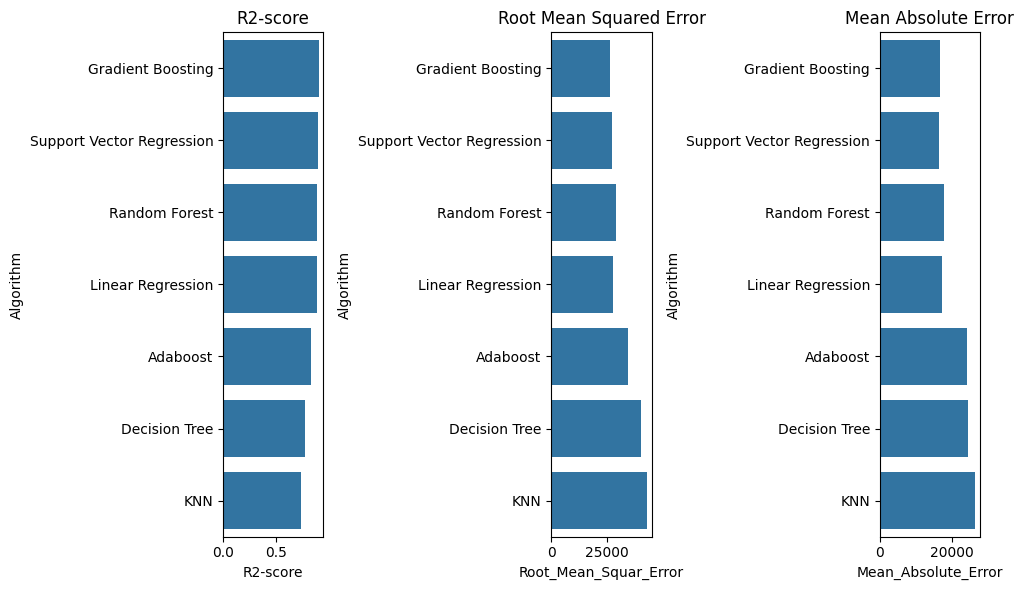

In [135]:

# Plotting
plt.figure(figsize=(10, 6))

# Plot R2-score
plt.subplot(1, 3, 1)
sns.barplot(x='R2-score', y='Algorithm', data=data)
plt.title('R2-score')

# Plot Root Mean Squared Error
plt.subplot(1, 3, 2)
sns.barplot(x='Root_Mean_Squar_Error', y='Algorithm', data=data)
plt.title('Root Mean Squared Error')

# Plot Mean Absolute Error
plt.subplot(1, 3, 3)
sns.barplot(x='Mean_Absolute_Error', y='Algorithm', data=data)
plt.title('Mean Absolute Error')

plt.tight_layout()
plt.show()

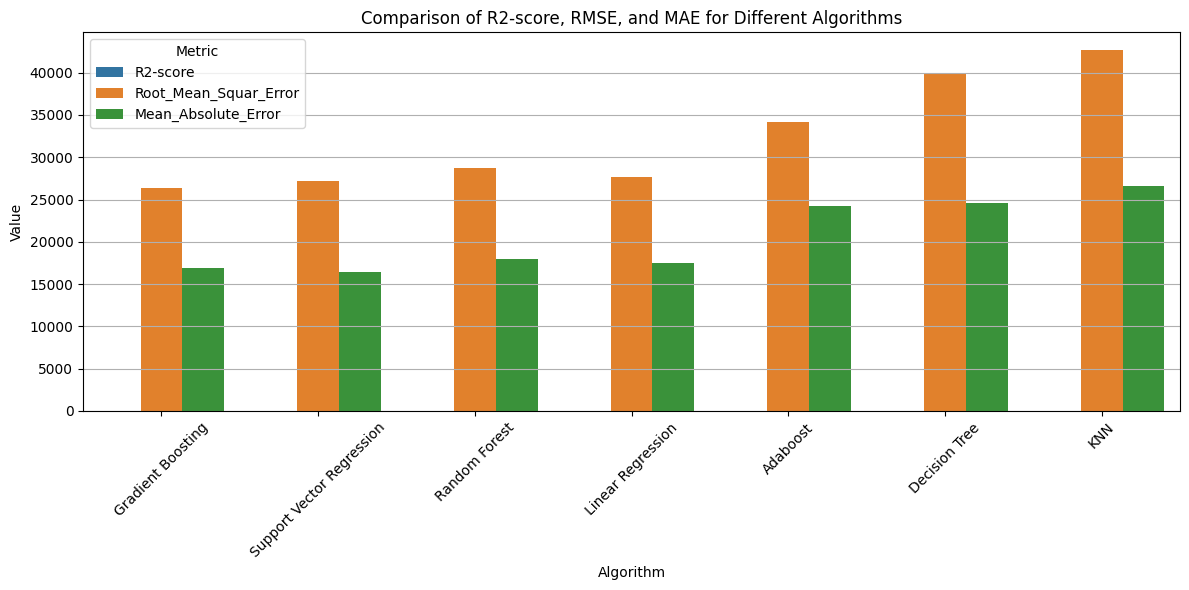

In [136]:
df = pd.DataFrame(data)

# Melt the DataFrame to have a column for metrics and their values
df_melted = df.melt(id_vars="Algorithm", 
                    value_vars=['R2-score', 'Root_Mean_Squar_Error', 'Mean_Absolute_Error'],
                    var_name="Metric", value_name="Value")

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='Value', hue='Metric', data=df_melted)

# Adding titles and improving readability
plt.title('Comparison of R2-score, RMSE, and MAE for Different Algorithms')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

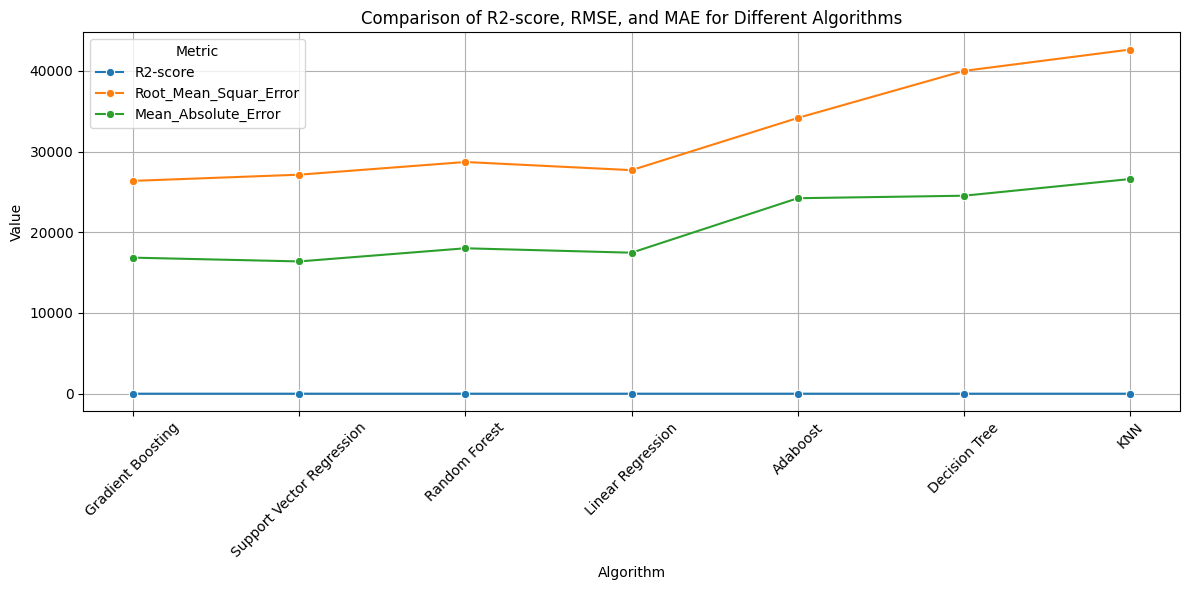

In [137]:
df = pd.DataFrame(data)

# Melt the DataFrame to have a column for metrics and their values
df_melted = df.melt(id_vars="Algorithm", 
                    value_vars=['R2-score', 'Root_Mean_Squar_Error', 'Mean_Absolute_Error'],
                    var_name="Metric", value_name="Value")

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Algorithm', y='Value', hue='Metric', marker='o')

# Adding titles and improving readability
plt.title('Comparison of R2-score, RMSE, and MAE for Different Algorithms')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Plot for Log Transform House price**

In [138]:
data = {
    'Algorithm': results['Algorithm'].tolist(),
    'R2-score': results['Log_R2-score'].tolist(),
    'Root_Mean_Squar_Error': results['Log_Root_Mean_Squar_Error'].tolist(),
    'Mean_Absolute_Error': results['Log_Mean_Absolute_Error'].tolist()
}

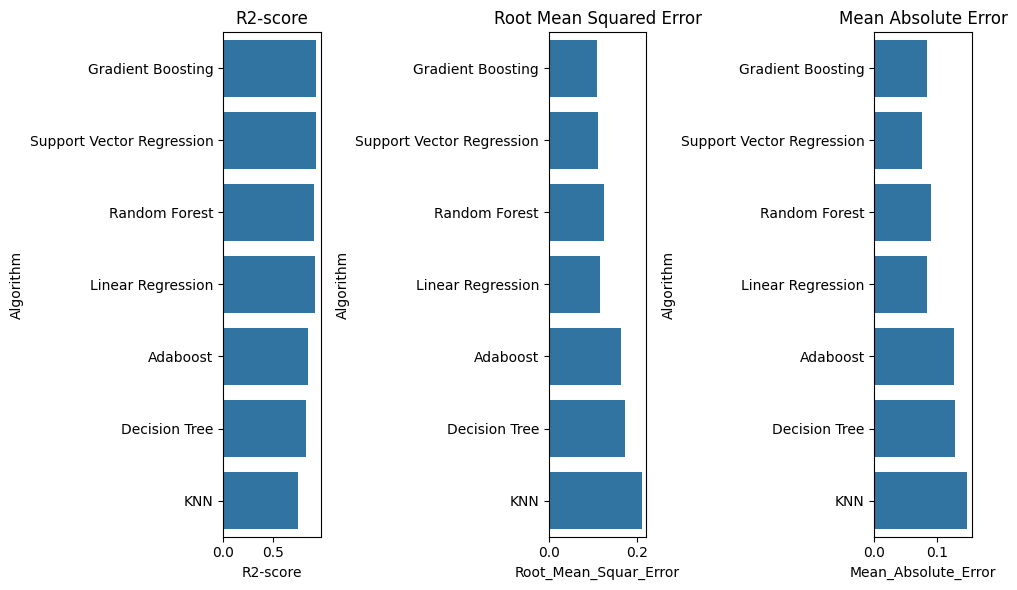

In [139]:

# Plotting
plt.figure(figsize=(10, 6))

# Plot R2-score
plt.subplot(1, 3, 1)
sns.barplot(x='R2-score', y='Algorithm', data=data)
plt.title('R2-score')

# Plot Root Mean Squared Error
plt.subplot(1, 3, 2)
sns.barplot(x='Root_Mean_Squar_Error', y='Algorithm', data=data)
plt.title('Root Mean Squared Error')

# Plot Mean Absolute Error
plt.subplot(1, 3, 3)
sns.barplot(x='Mean_Absolute_Error', y='Algorithm', data=data)
plt.title('Mean Absolute Error')

plt.tight_layout()
plt.show()

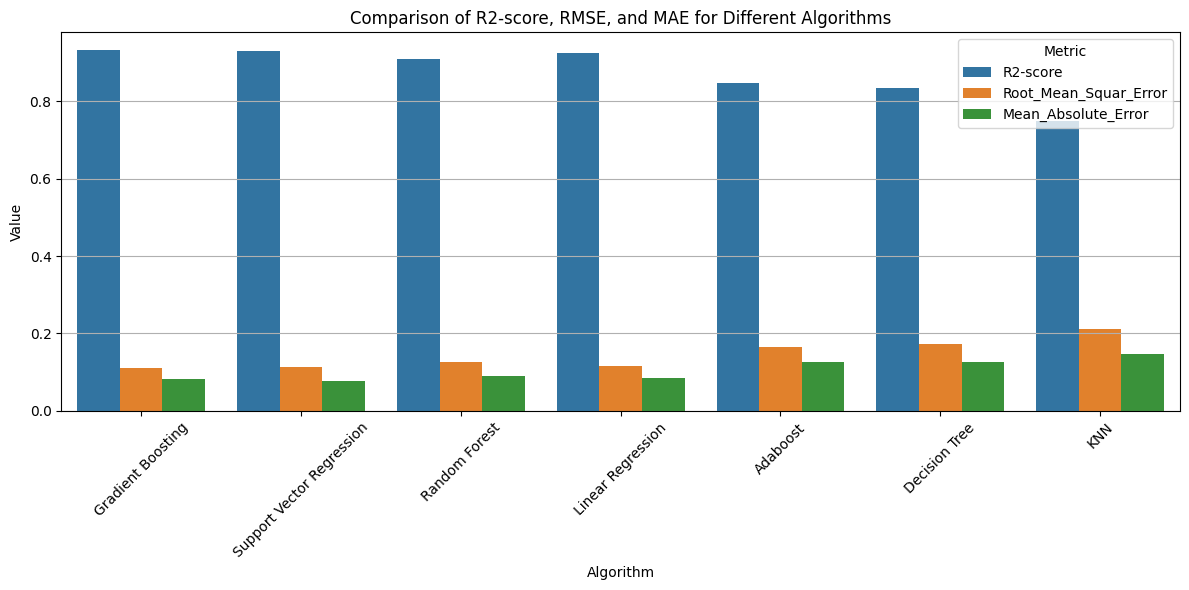

In [140]:
df = pd.DataFrame(data)

# Melt the DataFrame to have a column for metrics and their values
df_melted = df.melt(id_vars="Algorithm", 
                    value_vars=['R2-score', 'Root_Mean_Squar_Error', 'Mean_Absolute_Error'],
                    var_name="Metric", value_name="Value")

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='Value', hue='Metric', data=df_melted)

# Adding titles and improving readability
plt.title('Comparison of R2-score, RMSE, and MAE for Different Algorithms')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

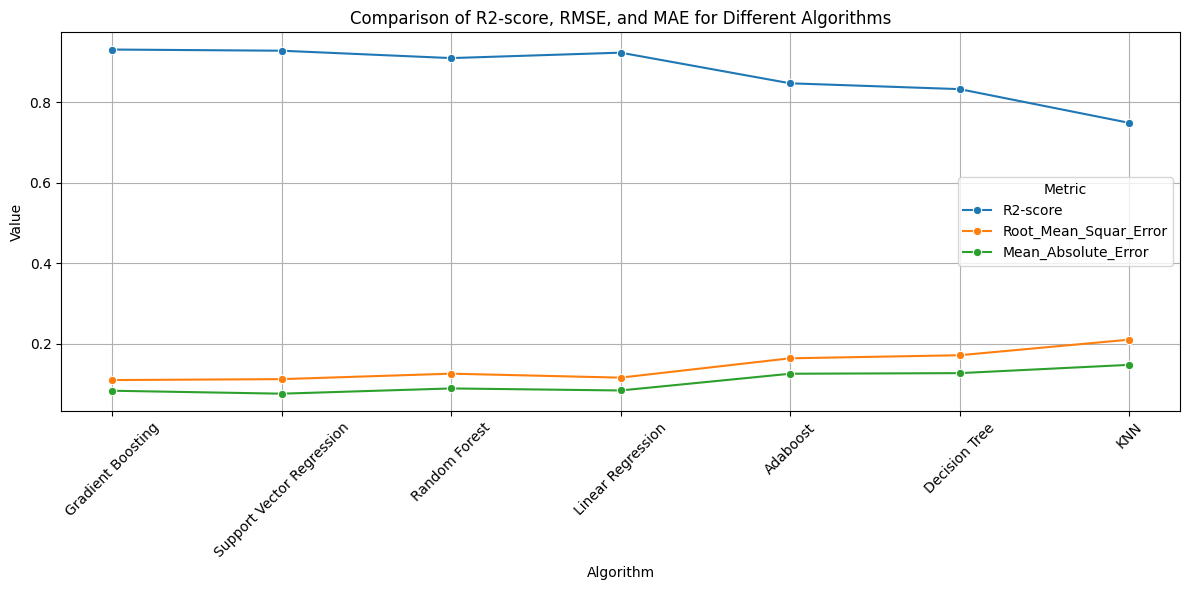

In [141]:
df = pd.DataFrame(data)

# Melt the DataFrame to have a column for metrics and their values
df_melted = df.melt(id_vars="Algorithm", 
                    value_vars=['R2-score', 'Root_Mean_Squar_Error', 'Mean_Absolute_Error'],
                    var_name="Metric", value_name="Value")

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Algorithm', y='Value', hue='Metric', marker='o')

# Adding titles and improving readability
plt.title('Comparison of R2-score, RMSE, and MAE for Different Algorithms')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Compare R2-Score for normal and Log transform of Houses price**

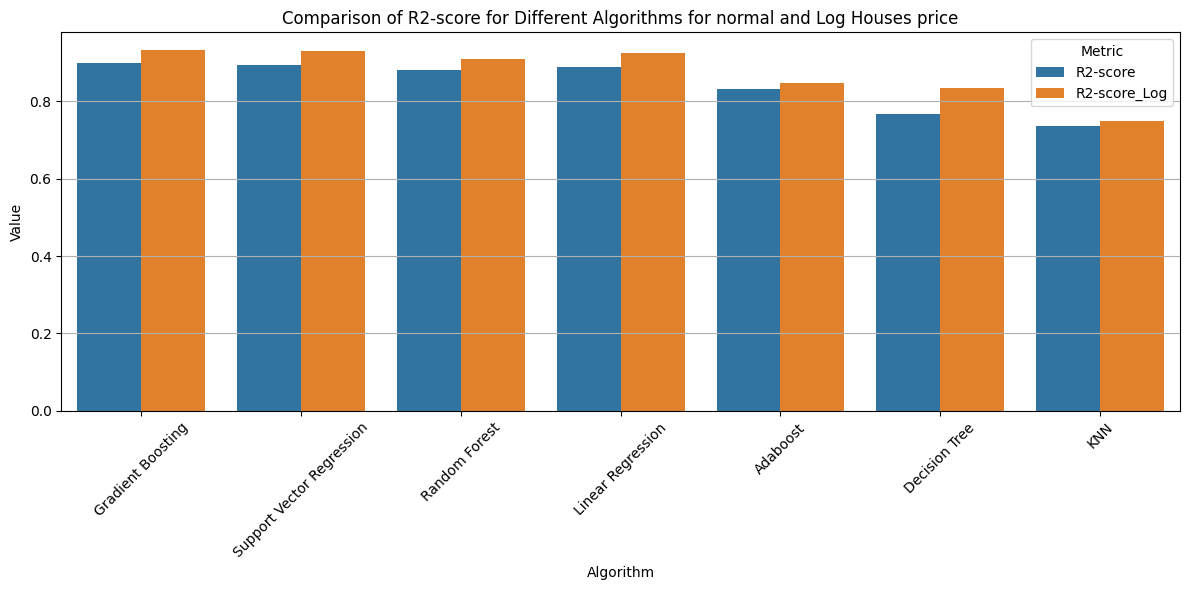

In [142]:
df = pd.DataFrame({
    'Algorithm': results['Algorithm'].tolist(),
    'R2-score': results['R2-score'].tolist(),
    'R2-score_Log': results['Log_R2-score'].tolist()
})

# Melt the DataFrame to have a column for metrics and their values
df_melted = df.melt(id_vars="Algorithm", 
                    value_vars=['R2-score', 'R2-score_Log'],
                    var_name="Metric", value_name="Value")

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='Value', hue='Metric', data=df_melted)

# Adding titles and improving readability
plt.title('Comparison of R2-score for Different Algorithms for normal and Log Houses price')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

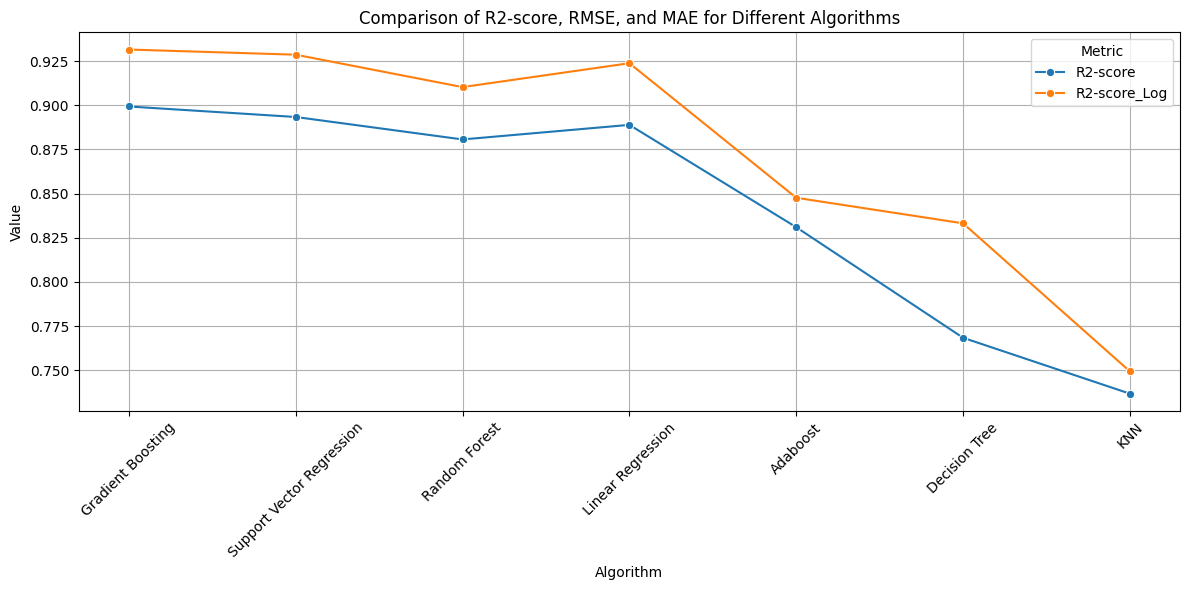

In [143]:
df = pd.DataFrame({
    'Algorithm': results['Algorithm'].tolist(),
    'R2-score': results['R2-score'].tolist(),
    'R2-score_Log': results['Log_R2-score'].tolist()
})

# Melt the DataFrame to have a column for metrics and their values
df_melted = df.melt(id_vars="Algorithm", 
                    value_vars=['R2-score', 'R2-score_Log'],
                    var_name="Metric", value_name="Value")

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Algorithm', y='Value', hue='Metric', marker='o')

# Adding titles and improving readability
plt.title('Comparison of R2-score, RMSE, and MAE for Different Algorithms')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

----